# lora inference
Observing inference with LoRA in Stable Diffusion

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new
No LoRA keys associated to CLIPTextModelWithProjection found with the prefix='text_encoder_2'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModelWithProjection related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


  0%|          | 0/50 [00:00<?, ?it/s]

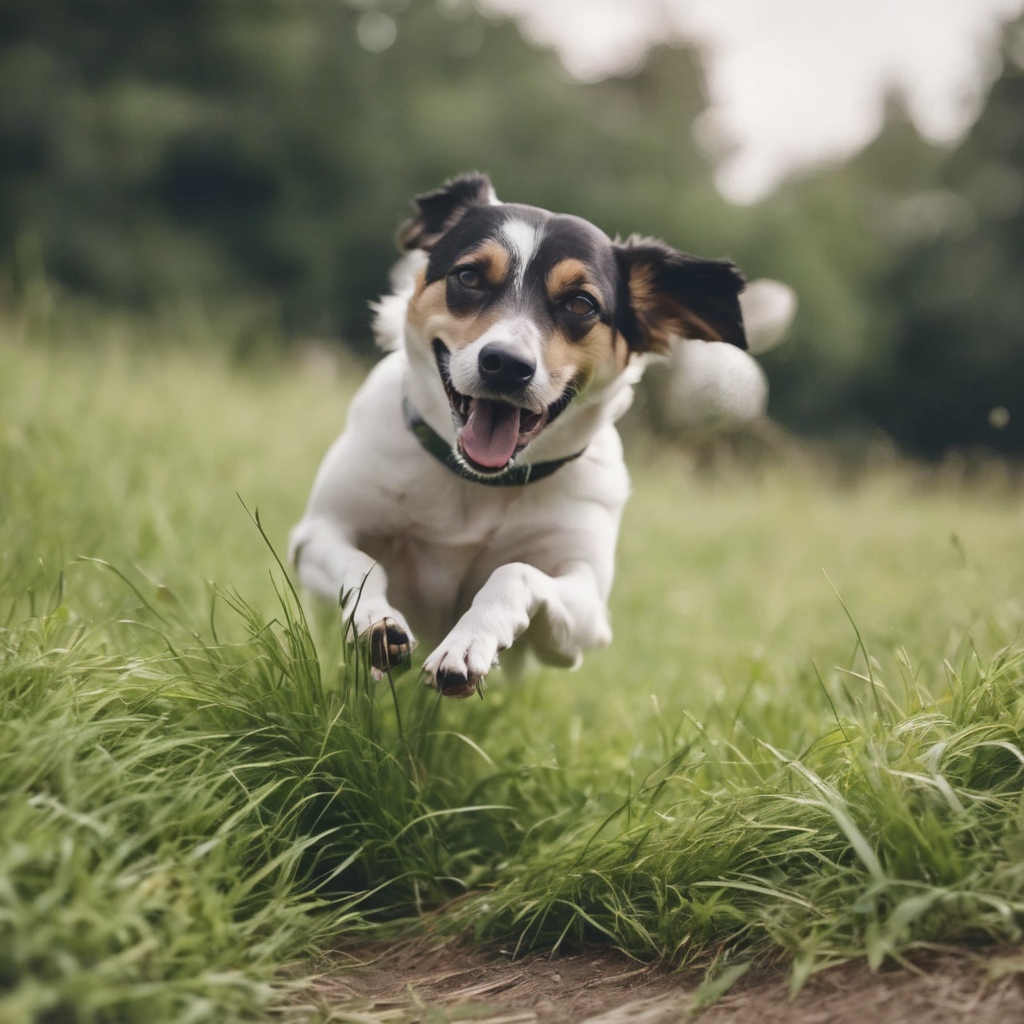

In [ ]:
import torch 
from diffusers import DiffusionPipeline

pipeline = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16
).to("cuda")
pipeline.load_lora_weights(
    "peft-internal-testing/artificialguybr__3DRedmond-V1",
    weight_name="3DRedmond-3DRenderStyle-3DRenderAF.safetensors",
    adapter_name="3d"
)
image = pipeline("dog rolling in grass").images[0]
image

Now you need to generate a different image using another LoRA adapter (e.g. `ostris/super-cereal-sdxl-lora`).
- Find the address and file name from HuggingFace.
- Load and activate the adapter.
- Write a prompt similar to the previous one.
- Display the image.

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

cereal_box_sdxl_v1.safetensors:   0%|          | 0.00/218M [00:00<?, ?B/s]

  0%|          | 0/50 [00:00<?, ?it/s]

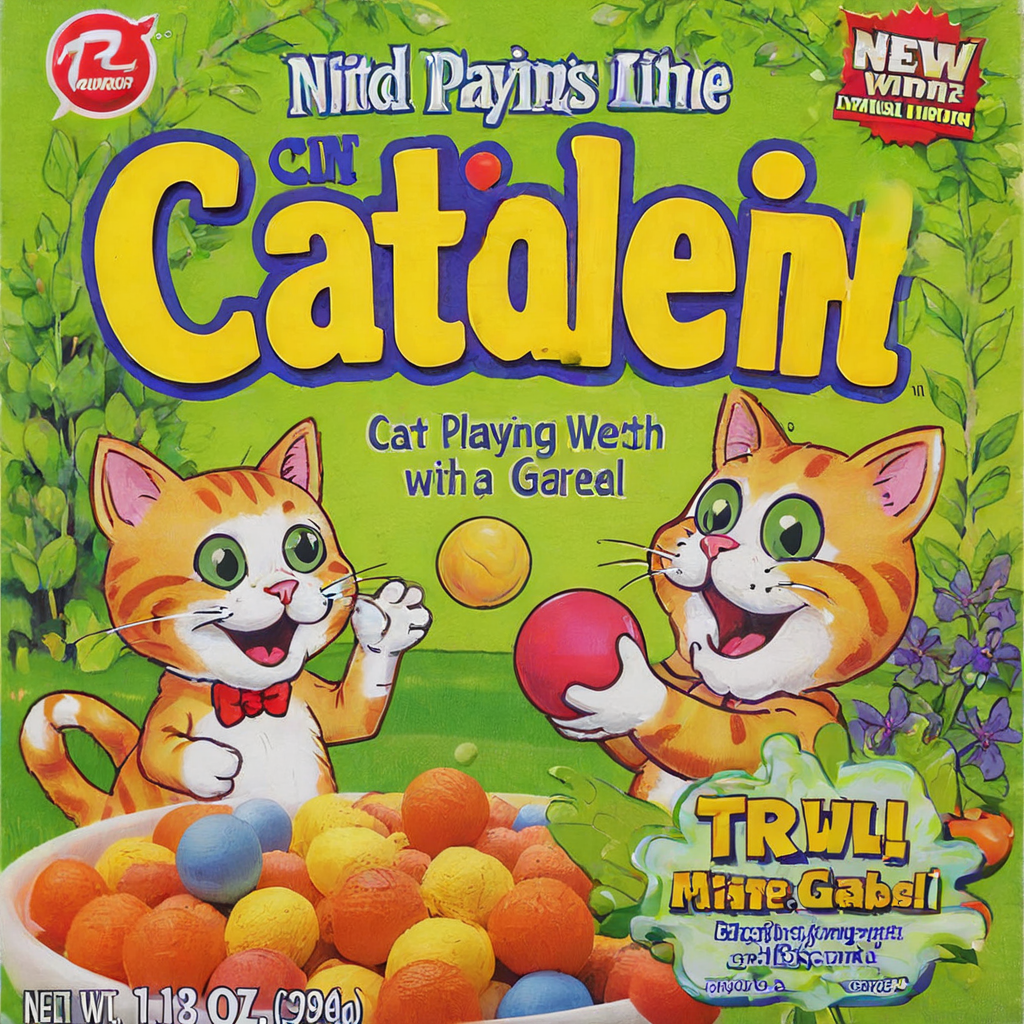

In [1]:
import torch
from diffusers import DiffusionPipeline
pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")

# Load the LoRA weights
pipeline.load_lora_weights(
    "ostris/super-cereal-sdxl-lora",
    weight_name="cereal_box_sdxl_v1.safetensors",
    adapter_name="cereal"
)

image = pipeline("cat playing with a ball in a garden").images[0]
image

# lora train

In [ ]:
!pip install -q peft transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB ? eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 865.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 527.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00


In [ ]:
pip install --upgrade datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
from datasets import load_dataset

ds = load_dataset("food101")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

In [ ]:
labels = ds["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

id2label[2]

'baklava'

In [ ]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


Write the `preprocess_train` and `preprocess_val` functions. In these functions, the following operations should be performed:
- RGB images are taken.
- For training data, random transforms such as crop and flip are used.
- For validation data, resize and center crop are used.
- The image is converted to a tensor and then normalized using the mean and standard deviation provided by `image_processor`.

In [ ]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)


def preprocess_train(example_batch):
    #### Write code here
    train_transforms = Compose([
        RandomResizedCrop(size=image_processor.size["height"]),  # Random crop with ViT size
        RandomHorizontalFlip(p=0.5),  # 50% chance of horizontal flip
        ToTensor(),  # Convert to tensor
        Normalize(mean=image_processor.image_mean, std=image_processor.image_std),  # Normalize
    ])
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    ####
    return example_batch

def preprocess_val(example_batch):
    #### Write code here
    val_transforms = Compose([
        Resize(size=image_processor.size["height"]),  # Resize to ViT size
        CenterCrop(size=image_processor.size["height"]),  # Center crop
        ToTensor(),  # Convert to tensor
        Normalize(mean=image_processor.image_mean, std=image_processor.image_std),  # Normalize
    ])
    example_batch["pixel_values"] = [
        val_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    ####
    return example_batch

The preprocess_train and preprocess_val functions have been written to transform images. Now you need to apply them to the training and validation datasets. First define train and val dataset and then perform preprocessing. If memory constraints arise, use part of the dataset.


In [ ]:
from datasets import Dataset

train_subset_size = int(0.1 * len(ds["train"]))  # 10% of training data
val_subset_size = int(0.1 * len(ds["validation"]))  # 10% of validation data

# Define train and validation datasets (subsets)
train_ds = ds["train"].shuffle(seed=42).select(range(train_subset_size))
val_ds = ds["validation"].shuffle(seed=42).select(range(val_subset_size))

# Apply preprocessing to the datasets
train_ds = train_ds.map(preprocess_train, batched=True, batch_size=32)
val_ds = val_ds.map(preprocess_val, batched=True, batch_size=32)

# Set format to PyTorch tensors for compatibility with training
train_ds.set_format("torch", columns=["pixel_values", "label"])
val_ds.set_format("torch", columns=["pixel_values", "label"])


Map:   0%|          | 0/7575 [00:00<?, ? examples/s]

Map:   0%|          | 0/2525 [00:00<?, ? examples/s]

Write a collate function that extracts the pixel_values ​​and labels for each
sample from the batch and converts them into a format suitable for the model.

In [ ]:
import torch

def collate_fn(examples):
    #### Write code here
    pixel_values = [example["pixel_values"] for example in examples]
    labels = [example["label"] for example in examples]

    pixel_values = torch.stack(pixel_values)
    labels = torch.tensor(labels, dtype=torch.long)
    ####
    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
from transformers import AutoModelForImageClassification, TrainingArguments, Trainer

model = AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,
)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Choose appropriate values ​​for r, lora_alpha, and target_modules.


In [ ]:
from peft import LoraConfig, get_peft_model

#### Write code here

config = LoraConfig(
    r=16,
    lora_alpha=32,
    target_modules=["query", "value"],
    lora_dropout=0.1,
    bias="none",
    modules_to_save=["classifier"],
)
model = get_peft_model(model, config)
model.print_trainable_parameters()

trainable params: 667,493 || all params: 86,543,818 || trainable%: 0.7713


In [ ]:
from transformers import TrainingArguments, Trainer

account = "Assignment"
peft_model_id = f"{account}/vit-base-patch16-224-in21k-lora"
batch_size = 128

args = TrainingArguments(
    peft_model_id,
    remove_unused_columns=False,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-3,
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=4,
    per_device_eval_batch_size=batch_size,
    fp16=True,
    num_train_epochs=5,
    logging_steps=10,
    load_best_model_at_end=True,
    label_names=["labels"],
    report_to="none",
)

After defining the Trainer, train the model.

In [ ]:
 #### Write code here
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    data_collator=collate_fn,
)

# Train the model
trainer.train()
####

TrainOutput(global_step=75, training_loss=1.079502110481262, metrics={'train_runtime': 1069.7068, 'train_samples_per_second': 35.407, 'train_steps_per_second': 0.07, 'total_flos': 2.960446615709184e+18, 'train_loss': 1.079502110481262, 'epoch': 5.0})

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


adapter_config.json:   0%|          | 0.00/709 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


adapter_model.safetensors:   0%|          | 0.00/2.68M [00:00<?, ?B/s]

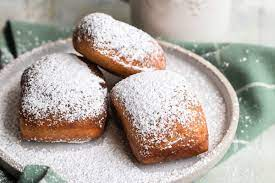

In [ ]:
from peft import PeftConfig, PeftModel
from transformers import AutoImageProcessor
from PIL import Image
import requests

config = PeftConfig.from_pretrained("/content/Assignment/vit-base-patch16-224-in21k-lora/checkpoint-75")
model = AutoModelForImageClassification.from_pretrained(
    config.base_model_name_or_path,
    label2id=label2id,
    id2label=id2label,
    ignore_mismatched_sizes=True,
)
model = PeftModel.from_pretrained(model, "stevhliu/vit-base-patch16-224-in21k-lora")

url = "https://huggingface.co/datasets/sayakpaul/sample-datasets/resolve/main/beignets.jpeg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
encoding = image_processor(image.convert("RGB"), return_tensors="pt")

with torch.no_grad():
    outputs = model(**encoding)
    logits = outputs.logits

Examine the model output and print the predicted class.

In [ ]:
# Get predicted class
predicted_class_idx = torch.argmax(logits, dim=-1).item()
predicted_class = id2label[predicted_class_idx]

# Print predicted class
print(f"Predicted class: {predicted_class}")

Predicted class: beignets
